In [1]:
# ipython magic
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

# plot configuration
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
# import seaborn as sns # sets another style
matplotlib.rcParams['lines.linewidth'] = 3
fig_width, fig_height = (7.0,5.0)
matplotlib.rcParams['figure.figsize'] = (fig_width, fig_height)

# font = {'family' : 'sans-serif',
#         'weight' : 'normal',
#         'size'   : 18.0}
# matplotlib.rc('font', **font)  # pass in the font dict as kwar

In [14]:
import chaospy as cp
import numpy as np
from numpy import linalg as LA

In [6]:
# show help for uniform distributions
cp.Uniform?

In [7]:
# show help for sample generation
cp.samplegen?

In [8]:
# simple distributions
rv1 = cp.Uniform(0, 1)
rv2 = cp.Normal(0, 1)
rv3 = cp.Lognormal(0, 1, 0.2, 0.8)
print(rv1, rv2, rv3)

Uniform(0,1) Normal(0,1) Lognormal(0,1,0.2,0.8)


In [9]:
# joint distributions
joint_distribution = cp.J(rv1, rv2, rv3)
print(joint_distribution)

J(Uniform(0,1),Normal(0,1),Lognormal(0,1,0.2,0.8))


In [10]:
# creating iid variables
X = cp.Normal()
Y = cp.Iid(X, 4)
print(Y)

[Normal(0,1)]4


Cholesky decomposition [1.0, q0, 0.7071067811865475q0^2-0.7071067811865475, 0.4082482904638631q0^3-1.2247448713915894q0]
Discretized Stieltjes / Thre terms reccursion [1.0, q0, 0.7071067811865475q0^2-0.7071067811865475, 0.4082482904638631q0^3-1.2247448713915892q0]
Modified Gram-Schmidt [1.0, q0, q0^2-1.0, 0.7071067811865475q0^3-2.121320343559643q0]


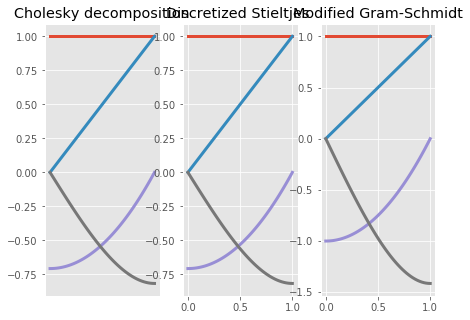

In [11]:
# example orthogonalization schemes
# a normal random variable
n = cp.Normal(0, 1)

x = np.linspace(0,1, 50)
# the polynomial order of the orthogonal polynomials
polynomial_order = 3

poly = cp.orth_chol(polynomial_order, n, normed=True)
print('Cholesky decomposition {}'.format(poly))
ax = plt.subplot(131)
ax.set_title('Cholesky decomposition')
_=plt.plot(x, poly(x).T)
_=plt.xticks([])

poly = cp.orth_ttr(polynomial_order, n, normed=True)
print('Discretized Stieltjes / Thre terms reccursion {}'.format(poly))
ax = plt.subplot(132)
ax.set_title('Discretized Stieltjes ')
_=plt.plot(x, poly(x).T)

poly = cp.orth_gs(polynomial_order, n, normed=True)
print('Modified Gram-Schmidt {}'.format(poly))
ax = plt.subplot(133)
ax.set_title('Modified Gram-Schmidt')
_=plt.plot(x, poly(x).T)

In [12]:
# sampling in chaospy
u = cp.Uniform(0,1)
u.sample?

(-0.055314637572702052,
 1.0553146375727018,
 -0.059895186603200895,
 1.0579420616032009)

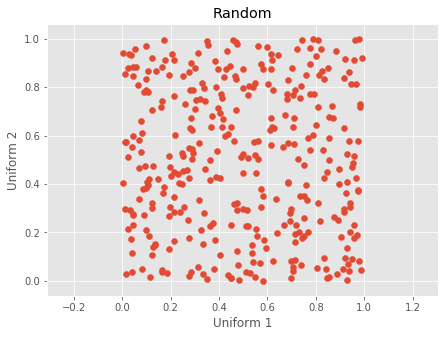

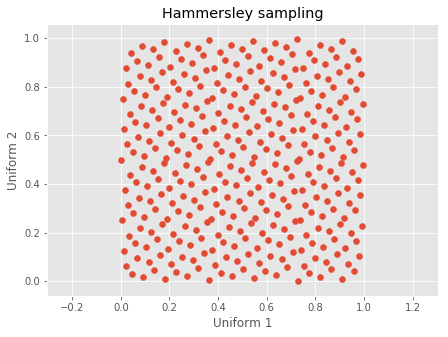

In [13]:
# example sampling
u1 = cp.Uniform(0,1)
u2 = cp.Uniform(0,1)
joint_distribution = cp.J(u1, u2)
number_of_samples = 350
samples_random = joint_distribution.sample(size=number_of_samples, rule='R')
samples_hammersley = joint_distribution.sample(size=number_of_samples, rule='M')

fig1, ax1 = plt.subplots()
ax1.set_title('Random')
ax1.scatter(*samples_random)
ax1.set_xlabel("Uniform 1")
ax1.set_ylabel("Uniform 2")
ax1.axis('equal')

fig2, ax2 = plt.subplots()
ax2.set_title('Hammersley sampling')
ax2.scatter(*samples_hammersley)
ax2.set_xlabel("Uniform 1")
ax2.set_ylabel("Uniform 2")
ax2.axis('equal')

In [1]:
# GARCH(1,1) Model in Python
#   uses maximum likelihood method to estimate (omega,alpha,beta)
# (c) 2014 QuantAtRisk, by Pawel Lachowicz; tested with Python 3.5 only

import numpy as np   
r = np.array([0.945532630498276,
              0.614772790142383,
              0.834417758890680,
              0.862344782601800,
              0.555858715401929,
              0.641058419842652,
              0.720118656981704,
              0.643948007732270,
              0.138790608092353,
              0.279264178231250,
              0.993836948076485,
              0.531967023876420,
              0.964455754192395,
              0.873171802181126,
              0.937828816793698])
 
from arch import arch_model
garch11 = arch_model(r, p=1, q=1)
res = garch11.fit(update_freq=10)
print(res.summary())


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.11819846205744461
            Iterations: 9
            Function evaluations: 60
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.004
Mean Model:             Constant Mean   Adj. R-squared:                 -0.004
Vol Model:                      GARCH   Log-Likelihood:               0.118198
Distribution:                  Normal   AIC:                           7.76360
Method:            Maximum Likelihood   BIC:                           10.5958
                                        No. Observations:                   15
Date:                Sun, Aug 18 2019   Df Residuals:                       11
Time:                        21:30:16   Df Model:                            4
                               Mean Model                               
     

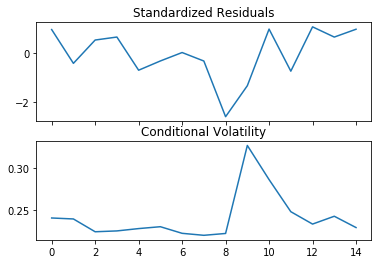

In [3]:
%matplotlib inline
fig=res.plot()

In [4]:
type(res)

arch.univariate.base.ARCHModelResult

In [5]:
res.params

mu          7.187086e-01
omega       4.852910e-02
alpha[1]    1.732524e-01
beta[1]     5.052867e-16
Name: params, dtype: float64

In [9]:
dj=res.forecast(horizon=5)
dj.simulations

In [21]:
import datetime as dt
import pandas_datareader.data as web
from arch import arch_model

start = dt.datetime(2015,1,1)
end = dt.datetime(2019,8,1)
sp = web.DataReader('^GSPC', 'yahoo', start=start, end=end)
returns=100*sp['Adj Close'].pct_change().dropna()
#djia = web.get_data_fred('DJIA')
#returns = 100 * djia['DJIA'].pct_change().dropna()
am = arch_model(returns)
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1282.673994824864
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1280.6715274160415
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1279.498438015923
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1278.0703460799964
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1277.2048782318616
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1276.5214764076254
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1275.9889069545754
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1275.8659111397747
Iteration:      9,   Func. Count:     66,   Neg. LLF: 1275.6406144550847
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1275.6344738134292
Iteration:     11,   Func. Count:     78,   Neg. LLF: 1275.6342633796016
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1275.634263379162
            Iterations: 11
            Function evaluations: 78
            Gradient evalu

mu          0.074992
omega       0.041393
alpha[1]    0.191074
beta[1]     0.754472
Name: params, dtype: float64


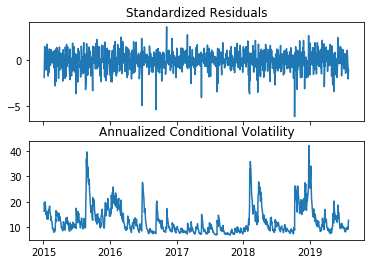

In [25]:
print(res.params)
fig=res.plot(annualize='D')

In [20]:
am.volatility

GARCH(p: 1, q: 1), id: 0x1a1c3b0f98